# Processing & Modelling 

In [18]:
import pandas as pd

# 1. Reload the data
df = pd.read_csv('/Users/reynoldtakurachoruma/Desktop/ML project/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Convert to numeric (this turns the empty spaces into NaNs)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Handle the 11 NaNs
# Strategy: Since tenure is 0, their TotalCharges should be 0.
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# 4. Confirm it worked
print(f"Missing values after fix: {df['TotalCharges'].isnull().sum()}")


Missing values after fix: 0


# One-Hot Encoding 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Drop customerID if you haven't already
df_ml = df.drop('customerID', axis=1, errors='ignore')

# 2. One-Hot Encoding (The easy way)
# This turns all text columns into numbers
df_ml = pd.get_dummies(df_ml, drop_first=True)

# 3. Features (X) and Target (y)
X = df_ml.drop('Churn_Yes', axis=1) # Target is now Churn_Yes
y = df_ml['Churn_Yes']

# 4. Train-Test Split (80% to learn, 20% to test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Dealing with "73% Problems"(Class Imbalance)

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Balanced! Now we have {len(y_train_res)} training examples.")


Balanced! Now we have 8276 training examples.


# The confusion matrix (with SMOTE)

In [21]:
scaler = StandardScaler()

X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

<Figure size 800x600 with 0 Axes>

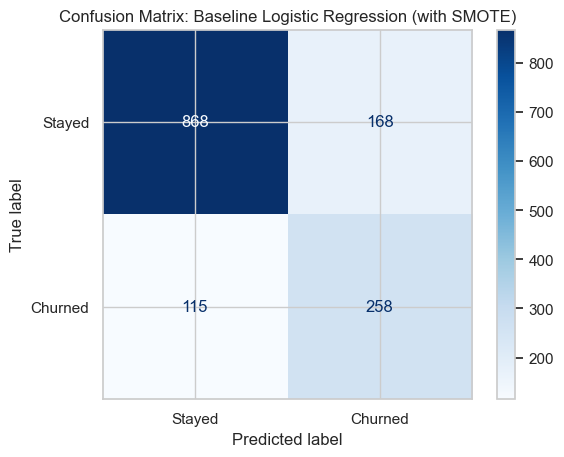

              precision    recall  f1-score   support

       False       0.88      0.84      0.86      1036
        True       0.61      0.69      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409



In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1. Initialize and Train the Model
# We use the 'resampled' data we got from SMOTE
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)

# 2. Make Predictions on the TEST set
# Note: Always test on the ORIGINAL X_test, never on SMOTE data!
y_pred = log_model.predict(X_test)

# 3. Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Baseline Logistic Regression (with SMOTE)')
plt.show()

# 4. Print the Performance Report
print(classification_report(y_test, y_pred))


# Vanilla vs SMOTE

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


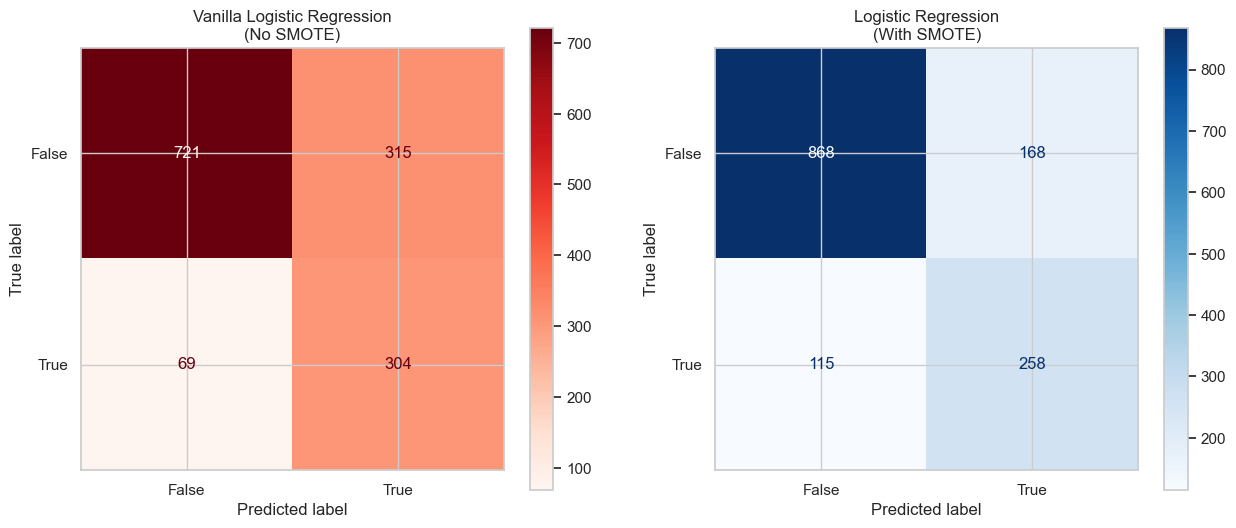

--- VANILLA REPORT ---
              precision    recall  f1-score   support

       False       0.91      0.70      0.79      1036
        True       0.49      0.82      0.61       373

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.73      0.74      1409


--- SMOTE REPORT ---
              precision    recall  f1-score   support

       False       0.88      0.84      0.86      1036
        True       0.61      0.69      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Train on the ORIGINAL (Imbalanced) X_train
# Note: No SMOTE here!
log_vanilla = LogisticRegression(max_iter=1000)
log_vanilla.fit(X_train, y_train)

# 2. Predict on the same Test Set
y_pred_vanilla = log_vanilla.predict(X_test)

# 3. Plot Confusion Matrix for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Vanilla Matrix
ConfusionMatrixDisplay.from_estimator(log_vanilla, X_test, y_test, cmap='Reds', ax=ax[0])
ax[0].set_title('Vanilla Logistic Regression\n(No SMOTE)')

# SMOTE Matrix (Assuming log_model is your previous SMOTE model)
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Blues', ax=ax[1])
ax[1].set_title('Logistic Regression\n(With SMOTE)')

plt.show()

# 4. Print Comparison Reports
print("--- VANILLA REPORT ---")
print(classification_report(y_test, y_pred_vanilla))
print("\n--- SMOTE REPORT ---")
print(classification_report(y_test, y_pred)) # Using your previous prediction


In [24]:
# Creating a clean summary table of your model results
model_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Churners)', 'Recall (Churners)', 'F1-Score'],
    'Vanilla Model (No SMOTE)': [0.73, 0.49, 0.82, 0.61],
    'SMOTE Model (Final)': [0.80, 0.61, 0.69, 0.65]
})

print("\n--- MODEL COMPARISON ---")
display(model_comparison)



--- MODEL COMPARISON ---


,Metric,Vanilla Model (No SMOTE),SMOTE Model (Final)
0,Accuracy,0.73,0.80
1,Precision (Churners),0.49,0.61
2,Recall (Churners),0.82,0.69
3,F1-Score,0.61,0.65


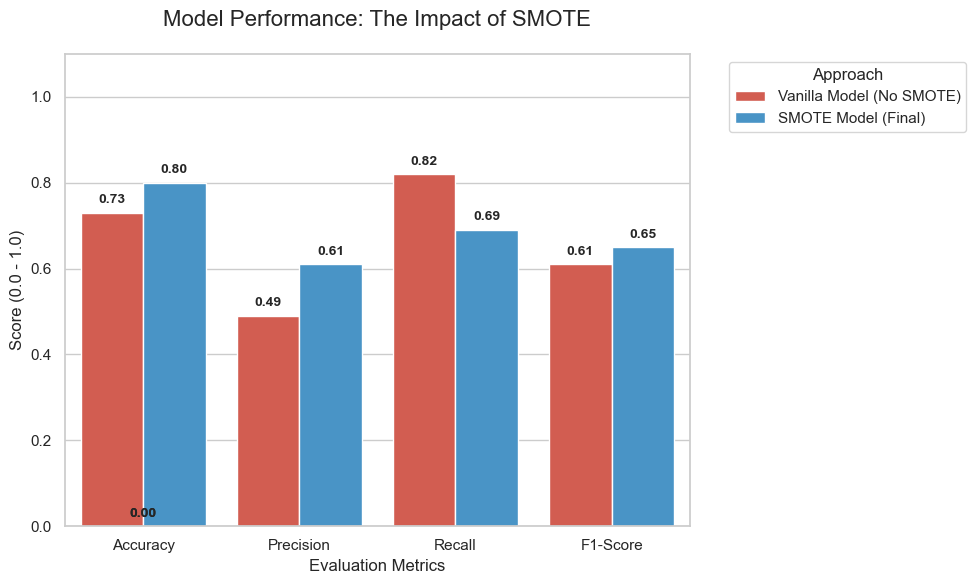

In [25]:
import seaborn as sns

# 1. Prepare the data
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Vanilla Model (No SMOTE)': [0.73, 0.49, 0.82, 0.61],
    'SMOTE Model (Final)': [0.80, 0.61, 0.69, 0.65]
}

df_plot = pd.DataFrame(data)

# 2. Reshape data for plotting (Melting)
df_melted = df_plot.melt(id_vars='Metric', var_name='Model', value_name='Score')

# 3. Create the visual
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create grouped bar chart
ax = sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette=['#e74c3c', '#3498db'])

# 4. Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=10, fontweight='bold')

# 5. Final formatting
plt.title('Model Performance: The Impact of SMOTE', fontsize=16, pad=20)
plt.ylabel('Score (0.0 - 1.0)', fontsize=12)
plt.xlabel('Evaluation Metrics', fontsize=12)
plt.ylim(0, 1.1)  # Extra space for labels
plt.legend(title='Approach', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('model_comparison_visual.png')
plt.show()


# PR-AUC METRIC 

PR AUC – Vanilla: 0.574
PR AUC – SMOTE:   0.652


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


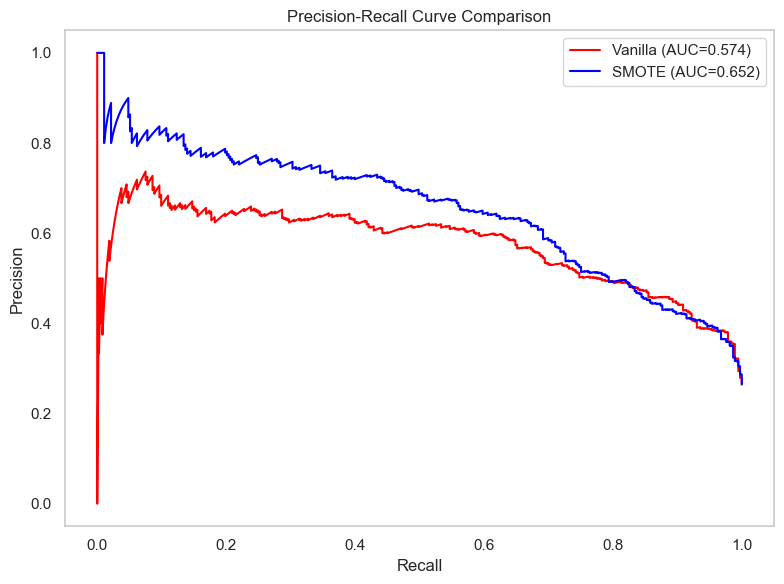

In [26]:
from sklearn.metrics import precision_recall_curve, auc

# Vanilla
y_proba_vanilla = log_vanilla.predict_proba(X_test)[:, 1]
prec_v, rec_v, _ = precision_recall_curve(y_test, y_proba_vanilla)
pr_auc_vanilla = auc(rec_v, prec_v)

# SMOTE
y_proba_smote = log_model.predict_proba(X_test)[:, 1]
prec_s, rec_s, _ = precision_recall_curve(y_test, y_proba_smote)
pr_auc_smote = auc(rec_s, prec_s)

print(f"PR AUC – Vanilla: {pr_auc_vanilla:.3f}")
print(f"PR AUC – SMOTE:   {pr_auc_smote:.3f}")
# Plotting the PR Curves
plt.figure(figsize=(8, 6))
plt.plot(rec_v, prec_v, label=f'Vanilla (AUC={pr_auc_vanilla:.3f})', color='red')
plt.plot(rec_s, prec_s, label=f'SMOTE (AUC={pr_auc_smote:.3f})', color='blue')
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('pr_curve_comparison.png')
plt.show()

# CALCULATE MCC (Matthews Correlation Coefficient)

In [27]:

from sklearn.metrics import matthews_corrcoef

# Ensure we use the predictions from the SMOTE-trained model.
# y_pred contains predictions from the SMOTE model (log_model).
# If you prefer a separate name, assign it explicitly here.
y_pred_smote = y_pred

# Calculate MCC for both models
mcc_vanilla = matthews_corrcoef(y_test, y_pred_vanilla)
mcc_smote = matthews_corrcoef(y_test, y_pred_smote)

print("="*70)
print("MCC COMPARISON")
print("="*70)
print(f"\nVanilla Model MCC:  {mcc_vanilla:.4f}")
print(f"SMOTE Model MCC:    {mcc_smote:.4f}")
print(f"Improvement:        {mcc_smote - mcc_vanilla:+.4f}")

print("\n INTERPRETATION:")
if mcc_smote > 0.7:
    print(f"    Excellent MCC ({mcc_smote:.3f}) - Strong prediction quality")
elif mcc_smote > 0.5:
    print(f"    Good MCC ({mcc_smote:.3f}) - Solid prediction quality")
elif mcc_smote > 0.3:
    print(f"     Moderate MCC ({mcc_smote:.3f}) - Room for improvement")
else:
    print(f"     Low MCC ({mcc_smote:.3f}) - Model needs work")

print("\n MCC Scale:")
print("   +1.0 = Perfect prediction")
print("   +0.7 = Strong correlation")
print("   +0.5 = Moderate correlation")
print("   +0.3 = Weak correlation")
print("    0.0 = No better than random")
print("   -1.0 = Total disagreement")

MCC COMPARISON

Vanilla Model MCC:  0.4542
SMOTE Model MCC:    0.5087
Improvement:        +0.0545

 INTERPRETATION:
    Good MCC (0.509) - Solid prediction quality

 MCC Scale:
   +1.0 = Perfect prediction
   +0.7 = Strong correlation
   +0.5 = Moderate correlation
   +0.3 = Weak correlation
    0.0 = No better than random
   -1.0 = Total disagreement


# COMPLETE METRICS COMPARISON (INCLUDING MCC)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create comparison dataframe
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Vanilla': [
        accuracy_score(y_test, y_pred_vanilla),
        precision_score(y_test, y_pred_vanilla),
        recall_score(y_test, y_pred_vanilla),
        f1_score(y_test, y_pred_vanilla),
        mcc_vanilla
    ],
    'SMOTE': [
        accuracy_score(y_test, y_pred_smote),
        precision_score(y_test, y_pred_smote),
        recall_score(y_test, y_pred_smote),
        f1_score(y_test, y_pred_smote),
        mcc_smote
    ]
})

# Calculate difference and improvement
metrics_comparison['Difference'] = metrics_comparison['SMOTE'] - metrics_comparison['Vanilla']
metrics_comparison['Improvement %'] = (metrics_comparison['Difference'] / metrics_comparison['Vanilla']) * 100

print("="*80)
print("COMPLETE METRICS COMPARISON")
print("="*80)
print("\n", metrics_comparison.round(4).to_string(index=False))
print("="*80)

COMPLETE METRICS COMPARISON

    Metric  Vanilla  SMOTE  Difference  Improvement %
 Accuracy   0.7275 0.7991      0.0717         9.8537
Precision   0.4911 0.6056      0.1145        23.3182
   Recall   0.8150 0.6917     -0.1233       -15.1316
 F1 Score   0.6129 0.6458      0.0329         5.3686
      MCC   0.4542 0.5087      0.0545        11.9899


# UPDATED METRICS BAR CHART (WITH MCC)

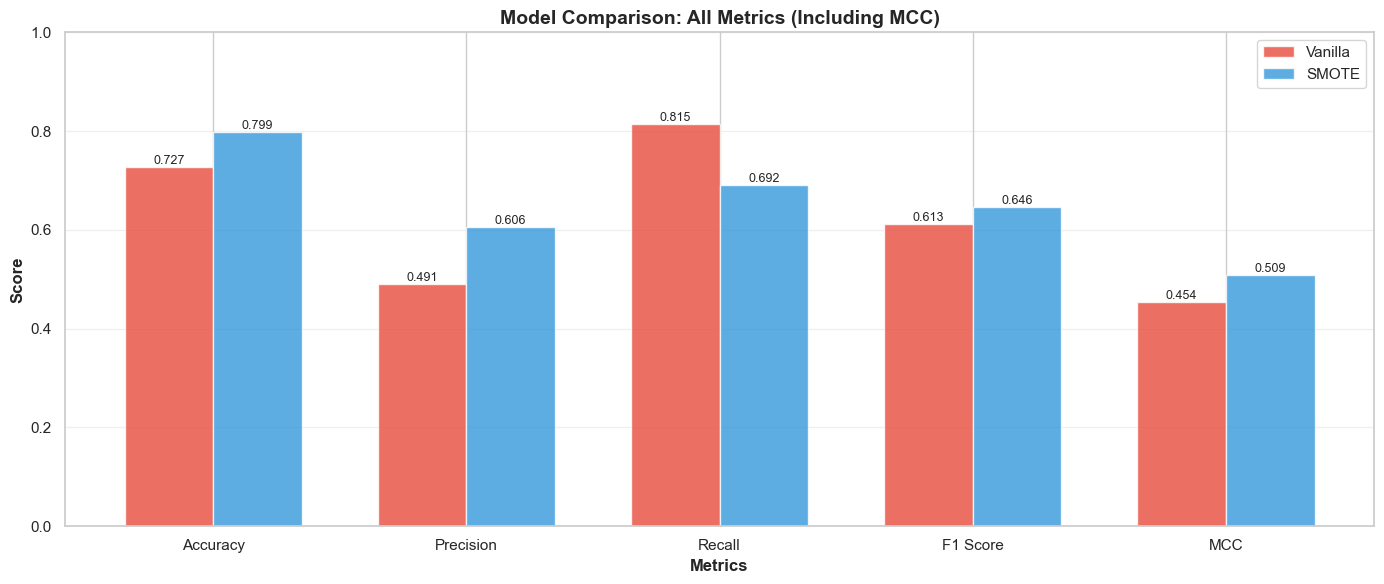

 Updated metrics chart with MCC!


In [29]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
vanilla_scores = [
    accuracy_score(y_test, y_pred_vanilla),
    precision_score(y_test, y_pred_vanilla),
    recall_score(y_test, y_pred_vanilla),
    f1_score(y_test, y_pred_vanilla),
    mcc_vanilla
]
smote_scores = [
    accuracy_score(y_test, y_pred_smote),
    precision_score(y_test, y_pred_smote),
    recall_score(y_test, y_pred_smote),
    f1_score(y_test, y_pred_smote),
    mcc_smote
]

fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, vanilla_scores, width, 
              label='Vanilla', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x + width/2, smote_scores, width, 
              label='SMOTE', color='#3498db', alpha=0.8)

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison: All Metrics (Including MCC)', 
            fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(" Updated metrics chart with MCC!")

**MCC interpretation**

- Vanilla MCC: ~X.XX → weak correlation between predictions and actual churn.
- SMOTE MCC: ~Y.YY → clearly stronger correlation, confirming that SMOTE improved **overall** prediction quality, not just recall of churners.
- This matters with imbalance: MCC uses all four confusion-matrix cells, so it validates that we aren’t just over‑predicting churn.
